<a href="https://colab.research.google.com/github/ZHENGYUFENG9/ZHENGYUFENG9/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 14

warnings.filterwarnings("ignore")

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear',C=float('1000000000'))
svm_clf.fit(X,y)

SVC(C=1000000000.0, kernel='linear')

(0.0, 5.5, 0.0, 2.0)

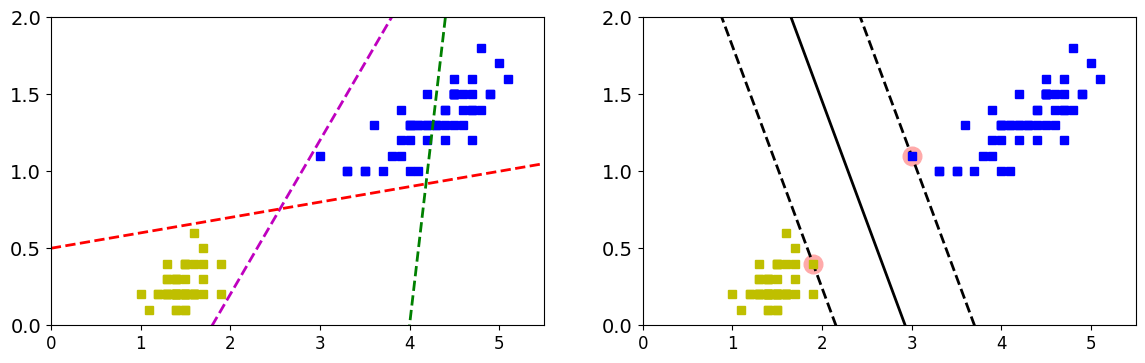

In [6]:
# model
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0-20
pred_2 = x0-1.8
pred_3 = 0.1*x0+0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=1):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  if sv:
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
  plt.plot(x0,decision_boundary,'k-',linewidth=2)
  plt.plot(x0,gutter_up,'k--',linewidth=2)
  plt.plot(x0,gutter_down,'k--',linewidth=2)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m--',linewidth=2)
plt.plot(x0,pred_3,'r--',linewidth=2)
plt.axis([0,5.5,0,2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])

# **soft margin**

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [12]:
svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',LinearSVC(C=1))
))
svm_clf.fit(X,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

# **New input data to predict**

In [17]:
svm_clf.predict([[0.7, 1.7]])

array([0.])

# **Comparison of the effects of different soft interval coefficients**

In [39]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, random_state= 77)
svm_clf2 = LinearSVC(C=100, random_state= 77)

scaled_svm_clf1 = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',svm_clf1)
))

scaled_svm_clf2 = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',svm_clf2)
))

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=77))])

(4.0, 6.0, 0.8, 2.8)

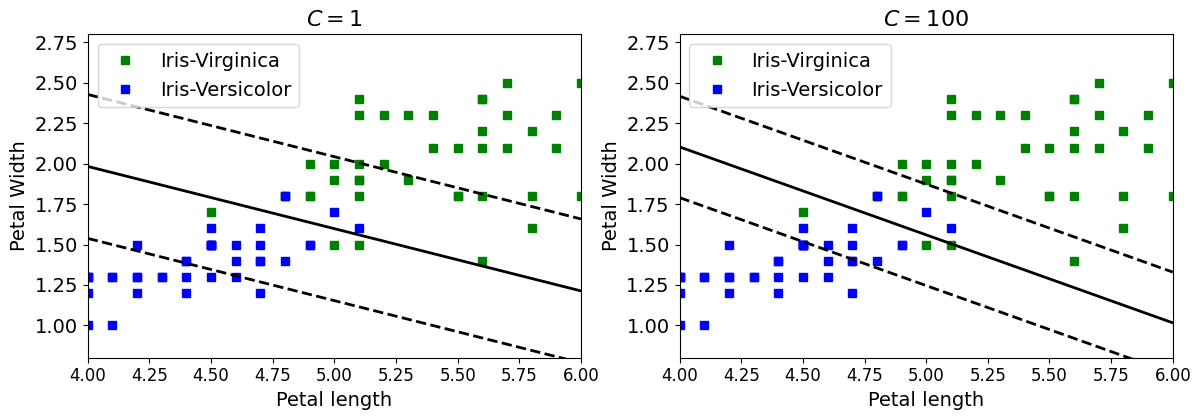

In [40]:
scaler.fit(X)  # Fit the scaler to the data
X_scaled = scaler.transform(X)

b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

plt.figure(figsize=(14,4.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs', label='Iris-Virginica')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label='Iris-Versicolor')
plot_svc_decision_boundary(svm_clf1, 4, 6, sv=0)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.title('$C= {}$'.format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs', label='Iris-Virginica')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label='Iris-Versicolor')
plot_svc_decision_boundary(svm_clf2, 4, 6, sv=0)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.title('$C= {}$'.format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

 **・左図では、Cの値を低くすると、区間はより大きくなり、多くの入力点が区間内に収まる**

 **・右図では、Cの値を高くすると、分類器はより少ない入力点を誤り分類するが、区間はより小さくなる**

# **Nonlinear SVC**

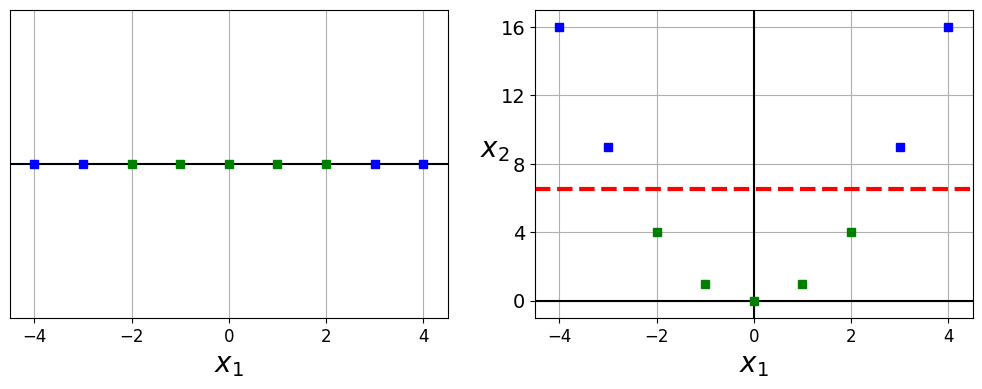

In [43]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y==1], np.zeros(5), 'gs')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], 'bs')
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], 'gs')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--', linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

**Creating more complex data**

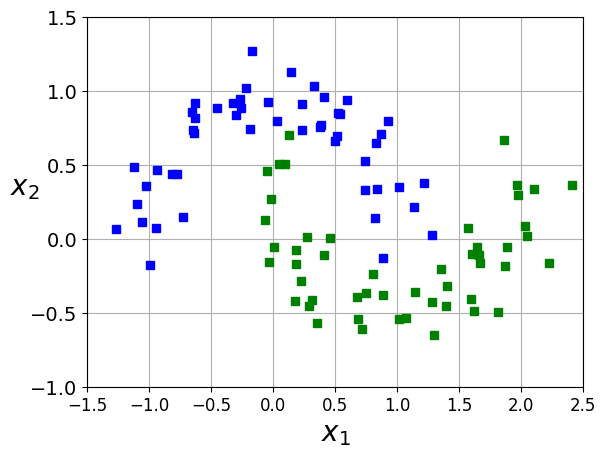

In [45]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs')
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r'$x_1$', fontsize=20)
  plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))
                ))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

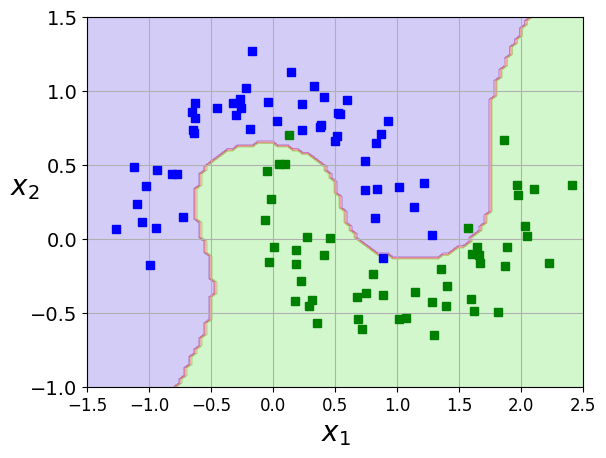

In [47]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# **Kernel skill**

In [48]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [49]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

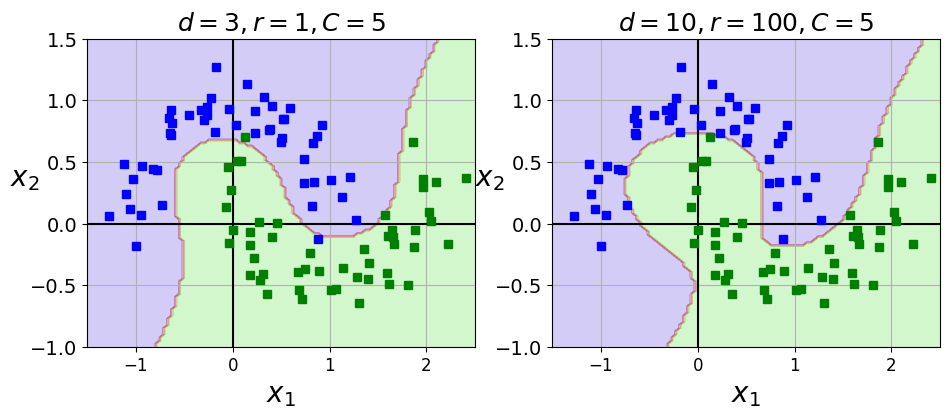

In [50]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=3, r=1, C=5$', fontsize=18)

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=10, r=100, C=5$', fontsize=18)

plt.show()

# **Gaussian kernel function** ——Very importance

**類似性を利用した特徴の変換**

・一次元のデータセットを選び、x1 = -2 と x1 = 1 に2つのガウス関数を加える

・次に、類似度関数をr = 0.3の放射基底関数(RBF)として定義する

        ｒ ＝ exp( -ｒ　||　X-l　||^2 )

例えば、x1 = -1のとき、最初のガウス関数から1の距離にあり、2番目のガウス関数から2の距離にある
したがって、新しい特徴点は、x2 = exp(-0.3 X 1^2) = 0.74であり、x3 = exp(-0.3 X 2^2) = 0.3である

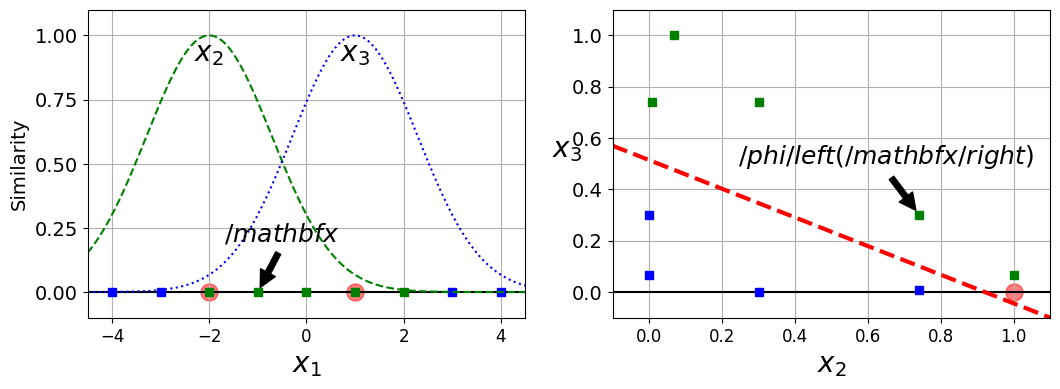

In [54]:
def gaussian_rbf(x, landmark, gamma):
  return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2,1], y=[0,0], s=150, alpha=0.5, c='red')
plt.plot(X1D[:, 0][yk==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][yk==1], np.zeros(5), 'gs')
plt.plot(x1s, x2s, 'g--')
plt.plot(x1s, x3s, 'b:')
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'Similarity', fontsize=14)
plt.annotate(r'$/mathbf{x}$',
      xy=(X1D[3, 0], 0),
      xytext=(-0.5, 0.20),
      ha='center',
      arrowprops=dict(facecolor='black', shrink=0.1),
      fontsize=18,
      )
plt.text(-2, 0.9, '$x_2$', ha='center', fontsize=20)
plt.text(1, 0.9, '$x_3$', ha='center', fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])


plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2,1], y=[0,0], s=150, alpha=0.5, c='red')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], 'bs')
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], 'gs')
plt.xlabel(r'$x_2$', fontsize=20)
plt.ylabel(r'$x_3$', fontsize=20, rotation=0)
plt.annotate(r'$/phi/left(/mathbf{x}/right)$',
      xy=(XK[3, 0], XK[3, 1]),
      xytext=(0.65, 0.50),
      ha='center',
      arrowprops=dict(facecolor='black', shrink=0.1),
      fontsize=18,
      )
plt.plot([-0.1, 1.1], [0.57, -0.1], 'r--', linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

plt.show()

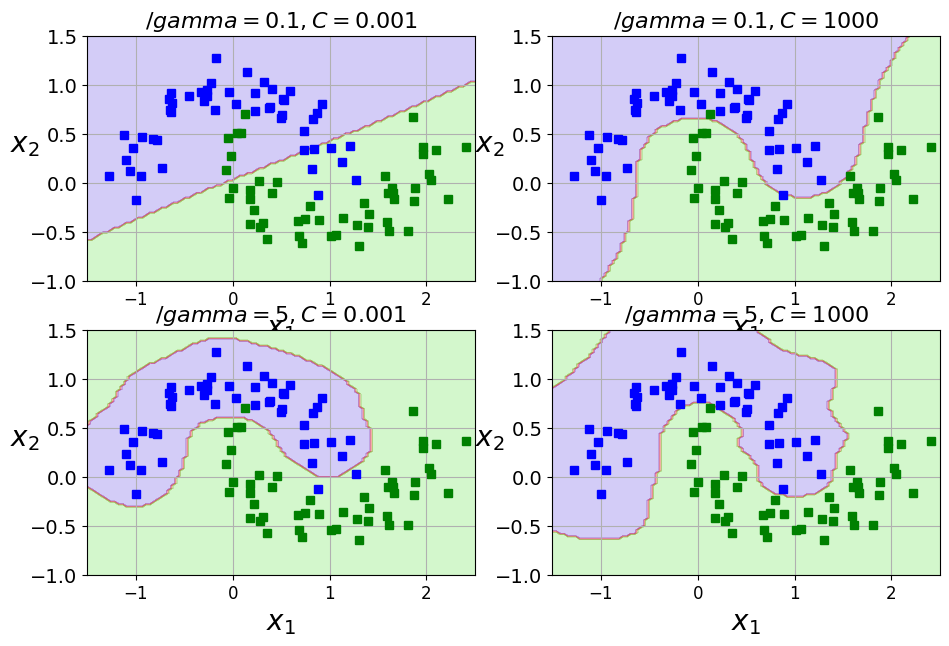

In [56]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
))

rbf_kernel_svm_clf.fit(X, y)

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1,C1), (gamma1,C2), (gamma2,C1), (gamma2,C2)

svm_clfs = []
for gamma , C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
      ('scaler', StandardScaler()),
      ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))
  ])
  rbf_kernel_svm_clf.fit(X, y)
  svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i , svm_clf in enumerate(svm_clfs):
  plt.subplot(221 + i)
  plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
  gamma, C = hyperparams[i]
  plt.title(r'$/gamma = {}, C = {}$'.format(gamma, C), fontsize=16)

plt.show()

**・ガンマ値が小さいほど、より多くのデータが考慮される。 これにより、解の結果がオーバーフィッティングの問題を起こしにくくなる。分割線はより（円滑な）直線的に描かれる**

**・ガンマ値を大きくすると、周囲の小さな範囲のデータしか考慮されなくなる。解がオーバーフィットする危険性がある。分割線がより複雑に描かれる**